In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 6

### Features:
- Ba -> Pitch angle in degree
- Rt -> hub temperature
- Yt -> Nacelle temperature
- Ws -> Wind speed
- Ot -> Putdoor tempreture  
(days)

In [2]:
data = pd.read_csv('data/la-haute-borne-data-2017-2020.csv',sep=';')
data['Date_time'] = pd.to_datetime(data['Date_time'], utc=True)
data = data.drop('Va1_avg', 1)
data = data.drop('Va2_avg', 1)
data = data.drop('Pas_avg', 1)

<ipython-input-2-2b170438e42f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Va1_avg', 1)
<ipython-input-2-2b170438e42f>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Va2_avg', 1)
<ipython-input-2-2b170438e42f>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Pas_avg', 1)


In [3]:
data["Date_time"] = pd.to_datetime(data['Date_time'], utc=True)

import datetime as dt
data["date"] = pd.to_datetime(data['Date_time']).apply(lambda x: x.date())
data['year'] = data['Date_time'].dt.year
data['month'] = data['Date_time'].dt.month
data['day'] = data['Date_time'].dt.day

In [4]:
data['day'] = data["day"].values
data["P_avg"] = data["P_avg"].clip(lower=0)

In [5]:
selected_columns = data[["P_avg","Ba_avg","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
df = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df["day"] = data["day"].copy()
df = df[df['P_avg'].notna()]
df = df[df['Ba_avg'].notna()]
df = df[df['Rt_avg'].notna()]
df = df[df['Yt_avg'].notna()]
df = df[df['Ws_avg'].notna()]
df = df[df['Ot_avg'].notna()]
# x = df[["Ba_avg","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
x = df[["Ba_avg","day","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
y = df['P_avg']

In [6]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train.values,y_train.values)

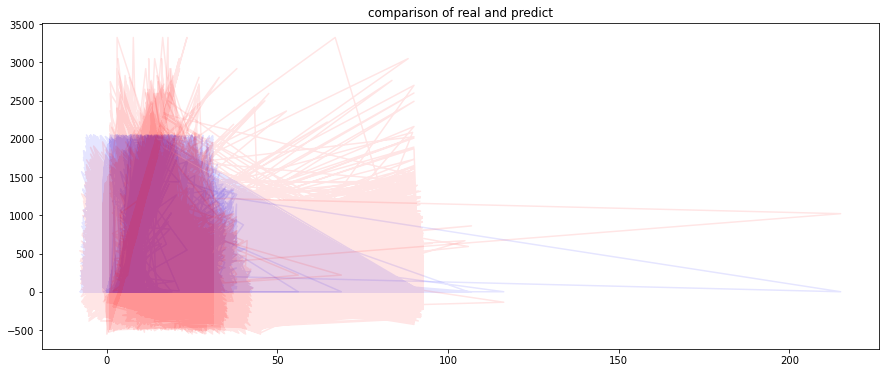

In [7]:
plt.plot(x_test.values, y_test.values, color = 'blue', alpha=0.1)
plt.plot(x_test.values, LinR.predict(x_test.values), color = 'red', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [8]:
x_test

,Ba_avg,day,Rt_avg,Yt_avg,Ws_avg,Ot_avg
65305,0.07,21,36.16,32.530000,3.48,30.18
205840,44.99,17,12.00,14.600000,3.21,4.08
21489,-1.00,25,26.00,23.420000,8.49,17.42
91398,45.00,28,25.00,34.640000,2.99,19.50
44971,45.00,28,25.00,34.780000,2.98,19.29
...,...,...,...,...,...,...
44087,44.99,22,29.00,35.600000,1.73,25.13
170911,-0.95,13,13.00,16.870000,9.37,2.14
130577,-0.99,5,19.00,20.280001,6.63,9.25
1527,-0.24,13,22.00,32.260000,3.61,15.69


##### try different plots:

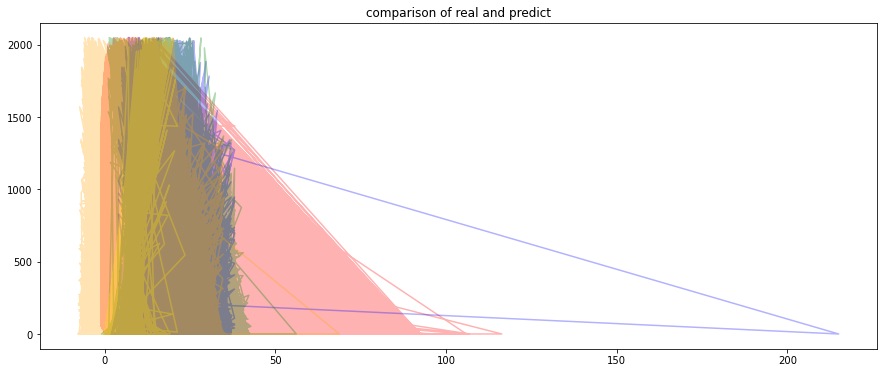

In [9]:
plt.plot(x_test["Ba_avg"].values, y_test.values, color = 'red', alpha=0.3)
plt.plot(x_test["Rt_avg"].values, y_test.values, color = 'blue', alpha=0.3)
plt.plot(x_test["Yt_avg"].values, y_test.values, color = 'green', alpha=0.3)
plt.plot(x_test["Ws_avg"].values, y_test.values, color = 'yellow', alpha=0.3)
plt.plot(x_test["Ot_avg"].values, y_test.values, color = 'orange', alpha=0.3)
# plt.plot(y_test.values, y_test.values, color = 'black', alpha=0.3)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [10]:
a = df.sort_values(by=["Ws_avg"], ascending=False) # Wind speed
b = df.sort_values(by=["Ot_avg"], ascending=False) # temperature
c = df.sort_values(by=["Yt_avg"], ascending=False) # nacelle temperature
d = df.sort_values(by=["Rt_avg"], ascending=False) # hub temperature
e = df.sort_values(by=["Ba_avg"], ascending=False) # pitch angle

In [17]:
b

,P_avg,Ba_avg,Rt_avg,Yt_avg,Ws_avg,Ot_avg,day
74205,4.30000,75.300003,15.46,39.560001,7.90,70.980003,3
15679,0.00000,91.699997,15.16,56.090000,6.08,68.699997,3
108390,0.00000,45.000000,36.00,41.630000,2.70,35.870000,21
108384,0.00000,45.000000,35.00,40.530000,0.88,35.860000,21
100836,0.00000,43.910000,35.00,40.530000,1.07,35.700000,21
...,...,...,...,...,...,...,...
124899,0.00000,92.610001,4.00,2.120000,5.46,-7.850000,6
60368,0.00000,92.610001,4.00,2.000000,4.50,-7.860000,6
52491,208.50999,-0.990000,6.00,21.660000,5.68,-7.920000,26
9369,0.00000,92.610001,4.00,2.530000,4.53,-7.940000,6


In [12]:
print('Coefficients:', model.coef_)
y_pred = abs(LinR.predict(x_test.values)) 
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))
from sklearn.metrics import r2_score
r2 = r2_score(y_test.values, y_pred)
print("r2: {}".format(r2))

Coefficients: [  1.72003239  -0.23851669   4.07010879  -9.84408664 154.4690433
  -0.97514052]
MAE: 134.57765755347776
RMSE: 189.97384683422248
r2: 0.8308202132878273


#### calculate Shapley Values:

In [13]:
import shap

In [29]:
# compute the SHAP values for the linear model
explainer = shap.LinearExplainer(LinR, x_test)
shap_values = explainer.shap_values(x_test)


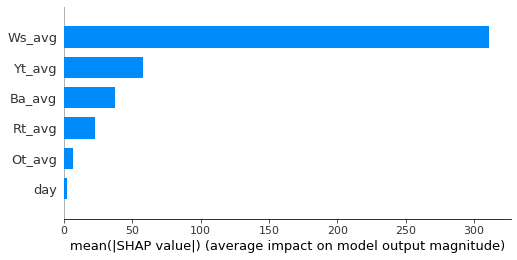

In [31]:
shap.summary_plot(shap_values, x, plot_type="bar")